In [1]:
from subprocess import run
from re import sub
from pydot import graph_from_dot_data
from IPython.display import Image, display, SVG

In [2]:
# A function which calls 'melos ls' in a subprocess
def melos_ls(args:list, ignore_example=True):
  command = ['melos', 'ls', '-r']
  if ignore_example:
    command += ['--ignore="*example*"']
  result = run(command + args, cwd='../', capture_output=True)
  return result.stdout.decode('utf-8'), result.returncode == 0

In [3]:
# JSON format
JT, JTsuccess = melos_ls(['--json', '-l'])
print(f'Success: {JTsuccess}')

Success: True


In [4]:
# JSON relational graph format
GT, GTsuccess = melos_ls(['--graph'])
print(f'Success: {GTsuccess}')

Success: True


In [5]:
# Graphviz format
GV, GVsuccess = melos_ls(['--gviz'], True)

# For some reason, melos outputs ";" inside the "[]"
# instead of "," so we reformat with regex:
GV = sub(r'(\[.*)(\;)(.*\])', r'\1,\3', GV)

# Ensure that the subprocess was successful
print(f'Success: {GVsuccess}')

Success: True


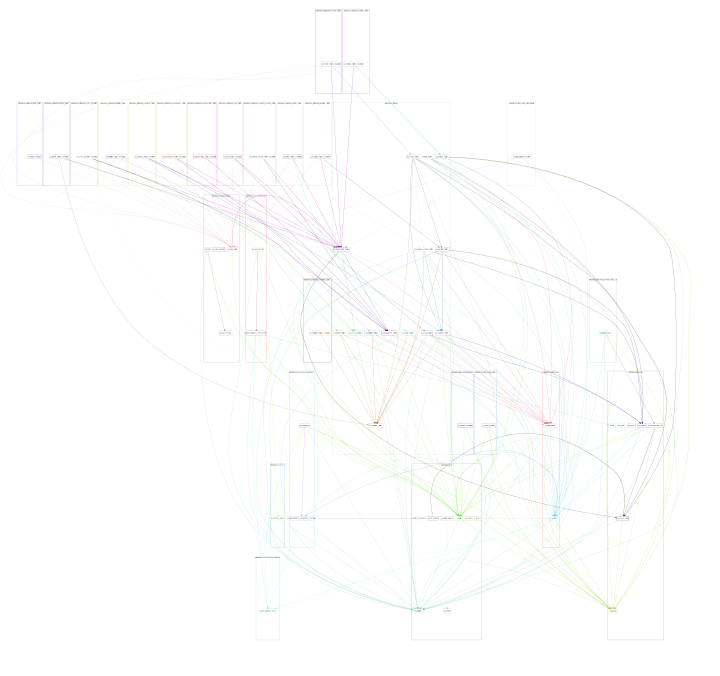

In [6]:
# Plot the Graphviz format
should_write = True
graphs = graph_from_dot_data(GV)
plt = SVG(graphs[0].create(prog='dot', format='svg'))
display(plt)
if should_write:
  with open('diagrams/package_tree_by_module.svg', 'w') as f:
    f.write(plt.data)
    f.close()

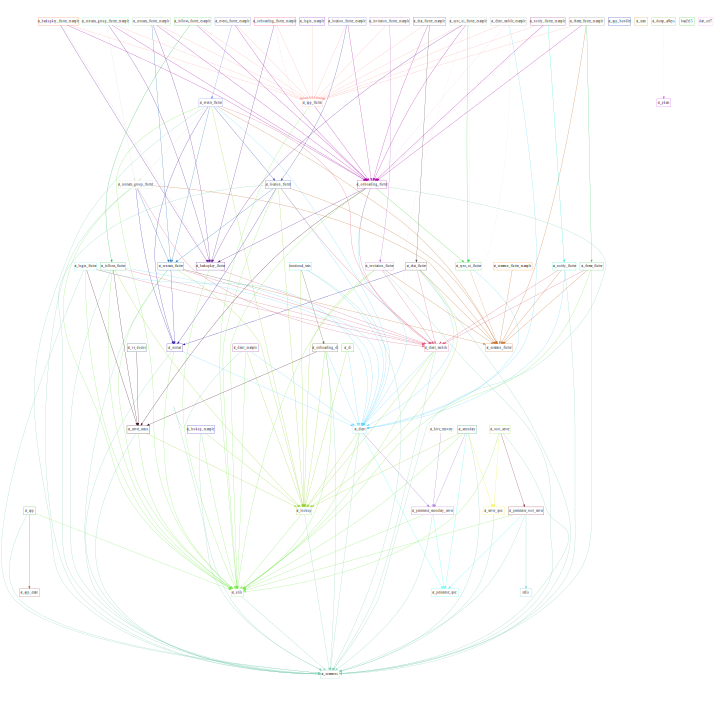

In [7]:
should_write = True

# Remove subgraphs (module groupings)
idx = GV.find('subgraph')
GVH = GV[:idx]
GVH += "}\n"

graphs = graph_from_dot_data(GVH)
plt = SVG(graphs[0].create(prog='dot', format='svg'))
display(plt)
if should_write:
  with open('diagrams/package_tree_hierarchical.svg', 'w') as f:
    f.write(plt.data)
    f.close()